In [1]:
library(data.table)
library(tidyverse)
library(magrittr)
library(plotly)
library(ggplot2)
library(rpart)
library(rpart.plot)
library(visNetwork)
library(broom) # for tidy statistical summaries
library(caret) # for regression performance measures
library(psych) # for pairwise comparisons
library(GGally) # for pairwise comparisons
library(lindia) # for qqplots
library(car)
library(BBmisc)
library(cluster)
library(compareGroups)
library(NbClust)
library(heatmaply)
library(dendextend)
library(circlize)
library(factoextra)
library(fastcluster)
library(microbenchmark)
library(formattable)
library(knitr)
library(kableExtra)
library(IRdisplay)
library(vegan)
library(listviewer)
options(repr.matrix.max.rows=20, repr.matrix.max.cols=30)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()     masks data.table::between()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::first()       masks data.table::first()
✖ lubridate::hour()    masks data.table::hour()
✖ lubridate::isoweek() masks data.table::isoweek()
✖ dplyr::lag()         masks stats::lag()
✖ dplyr::last()        masks data.table::last()
✖ lubridate::mday()    masks data.table::mday()
✖ lubridate::minute()  masks data.table::minute()
✖ lubridate::month()   masks data.table::month()
✖ lubridate::quarter() masks data.table::quarter()
✖ lubridate::second()

# Our Project: The effects of different habits and lifetyles on individuals' BMI

We wanted to look into the relation between the different types of lifestyles, addictions, diets, the amount of daily physical activity and bmi. From the variables we have in our dataset, we expected to see the ones who are eating more balanced and doing more physical activities, so to speak having more healthy lifestyles are expected to have lower BMI's.

## Importing the Data:

We downloaded the data we worked on from the UC Irvine Machine Learning Repository as you can find below: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

First we downloaded the csv file and afterwards we uploaded the dataset on our github repository to access it through the fread function.

In [2]:
odata <- fread("http://raw.githubusercontent.com/elifsakcay/ad48g-proje/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic%5B1%5D.csv")

In [3]:
odata

Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight
Female,23,1.50,55.0,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Motorbike,Normal_Weight
Male,22,1.64,53.0,no,no,2,3,Sometimes,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight
Male,24,1.78,64.0,yes,yes,3,3,Sometimes,no,2,no,1,1,Frequently,Public_Transportation,Normal_Weight


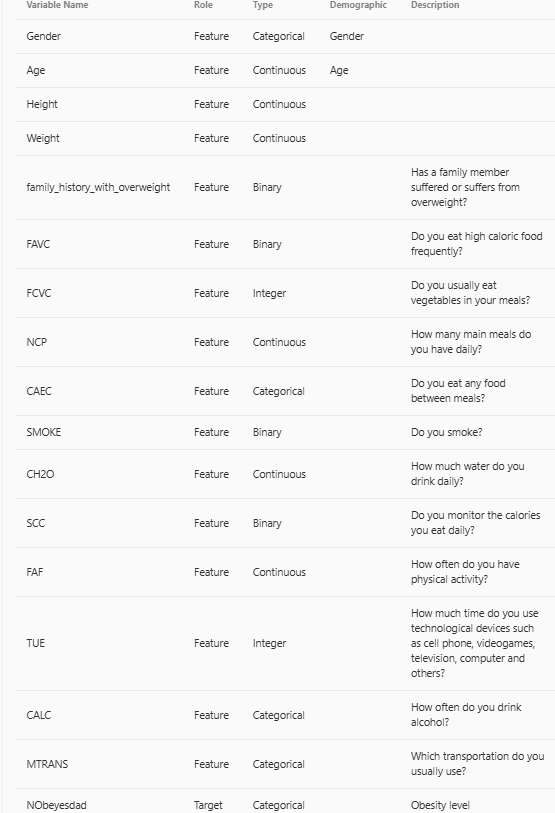

## Transformation of the Data:

In our data, we have mostly categorical features reflecting different kinds of routines and lifestyles that were determined by the answers to the questions above. Although we did not have the bmi column, since we didn't want to look at the relation between the variables in obesity data and weight basically as they must not be unhealthy if they are overweight, we added a new column and named it as "bmi". Since we did not have any variables related to their fat ratios, the best we can look at was their bmi ratios despite the insufficinecy of this statistics as well in showing the fat-muscle distirbution ratio in weight. 


In [4]:
odata_bmi<- odata %>% mutate( bmi = Weight / Height ^2)

Other than weight, height and age, there were some other continous-looking variables like CH20, NCP etc in the dataset. However, since their definitions are determined through categorical questions and their answer were reflecting some kind of ranges rather than a spesific hour - amount - liter, we turned them into factors.

Also, another issue here was after some point we observed that there was an issue in these categorical-in-nature variables as they were in double format but they had to be in integer format since they were determined in factor format normally, so there was a need to transform these variables into integers to turn them into factor format.

We followed 2 different ways to see which one would give a better result:

1)First we normalized the values and seperated them into the number of categories and put them into the relevant quartiles, tetiles etc.

2)We carried out a floor-operation to assign these values to the relevant categories.

After these two, we realized that if the references of some variables for factors got changed, it would be better to have more readible parameters. We releveled the CALC, CAEC, MTRANS factors.

In [5]:
odata_factor_floored <- copy(odata_bmi)

knifefunc <- function(the_list){
  the_name <- names(the_list)
  the_unique_quantile <- the_list %>% unlist %>% quantile %>% unique
  the_list %>% unlist %>% as.numeric %>% cut( breaks = the_unique_quantile  , labels = c(1:(length(the_unique_quantile)-1)), include.lowest = T)        
}
odata_normalized <- odata_bmi %>% mutate_at(vars(FAF, FCVC, NCP, CH2O, TUE), BBmisc::normalize)
odata_normalized <- odata_bmi %>% mutate_at(vars(FAF, FCVC, NCP, CH2O, TUE), knifefunc)

odata_factor_floored %<>% mutate_at(vars(FAF, FCVC, CH2O, TUE), function(x) x - x %% 1)
odata_factor_floored %<>% mutate(NCP = cut(odata$NCP , breaks = c(0, 1.5 , 3 , 5) , labels = c(0,1,2) , include.lowest = T )) 
odata_factor_floored %<>% mutate_at(vars(FAF, FCVC,  CH2O, TUE,SMOKE , CAEC, CALC ,SCC ,family_history_with_overweight , MTRANS , FAVC , Gender), as.factor)
odata_normalized %<>% mutate_at(vars(FAF, FCVC, NCP, CH2O, TUE,SMOKE , CAEC, CALC ,SCC ,family_history_with_overweight , MTRANS , FAVC , Gender), as.factor)
colname_vector <- c("FAF", "FCVC", "NCP", "CH2O", "TUE")
midata <- cbind(odata_bmi,  odata_factor_floored %>% select(all_of(colname_vector)) , odata_normalized %>% select(all_of(colname_vector)) )
colnames(midata)[(length(odata_bmi)+1):length(midata)] <- c(sprintf("%s_floored" , colname_vector) , sprintf("%s_normalized" , colname_vector))
midata %<>% mutate_at( vars(SMOKE , CAEC, CALC ,SCC ,family_history_with_overweight , MTRANS , FAVC , Gender), as.factor)
midata[, c("FAF", "FCVC", "NCP", "CH2O", "TUE") := NULL]
midata %>% str     
                                    
midata$CALC  <- relevel(midata$CALC, ref = "no")
midata$CAEC <- relevel(midata$CAEC, ref = "no")
midata$MTRANS <- relevel(midata$MTRANS, ref = "Bike")

Classes ‘data.table’ and 'data.frame':	2111 obs. of  23 variables:
 $ Gender                        : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 2 2 2 ...
 $ Age                           : num  21 21 23 27 22 29 23 22 24 22 ...
 $ Height                        : num  1.62 1.52 1.8 1.8 1.78 1.62 1.5 1.64 1.78 1.72 ...
 $ Weight                        : num  64 56 77 87 89.8 53 55 53 64 68 ...
 $ family_history_with_overweight: Factor w/ 2 levels "no","yes": 2 2 2 1 1 1 2 1 2 2 ...
 $ FAVC                          : Factor w/ 2 levels "no","yes": 1 1 1 1 1 2 2 1 2 2 ...
 $ CAEC                          : Factor w/ 4 levels "Always","Frequently",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ SMOKE                         : Factor w/ 2 levels "no","yes": 1 2 1 1 1 1 1 1 1 1 ...
 $ SCC                           : Factor w/ 2 levels "no","yes": 1 2 1 1 1 1 1 1 1 1 ...
 $ CALC                          : Factor w/ 4 levels "Always","Frequently",..: 3 4 2 2 4 4 4 4 2 3 ...
 $ MTRANS                    

## Visualization of the Descriptive Results:


Descriptive graphics for both continuous and categorical variables for both floored and normalized categorizations:

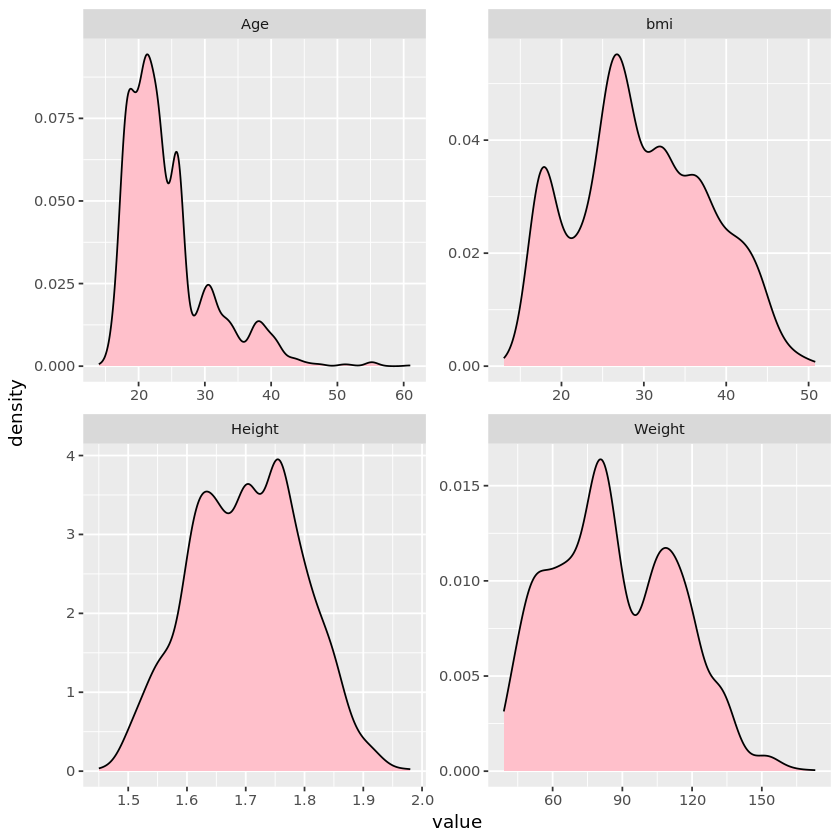

In [6]:
midata%>% select(Age, Height, Weight, bmi) %>%
    tidyr::gather() %>% 
    ggplot(aes(value)) + 
        facet_wrap(~ key, scale = "free" ) + 
        geom_density(fill = "pink") 


From the correlations we derived from the scatterplots below, we can ignore the high one between weight and bmi since bmi is calculated by height and weight but other than that, it can be said that as humans get older, their bmi also increases as their body mass also increases with their age. From the correlation between height and weight, we can also conclude that as humans get taller, their weight also incerases, and this is why we wanted to use bmi instead of their weight only in creating our model. 

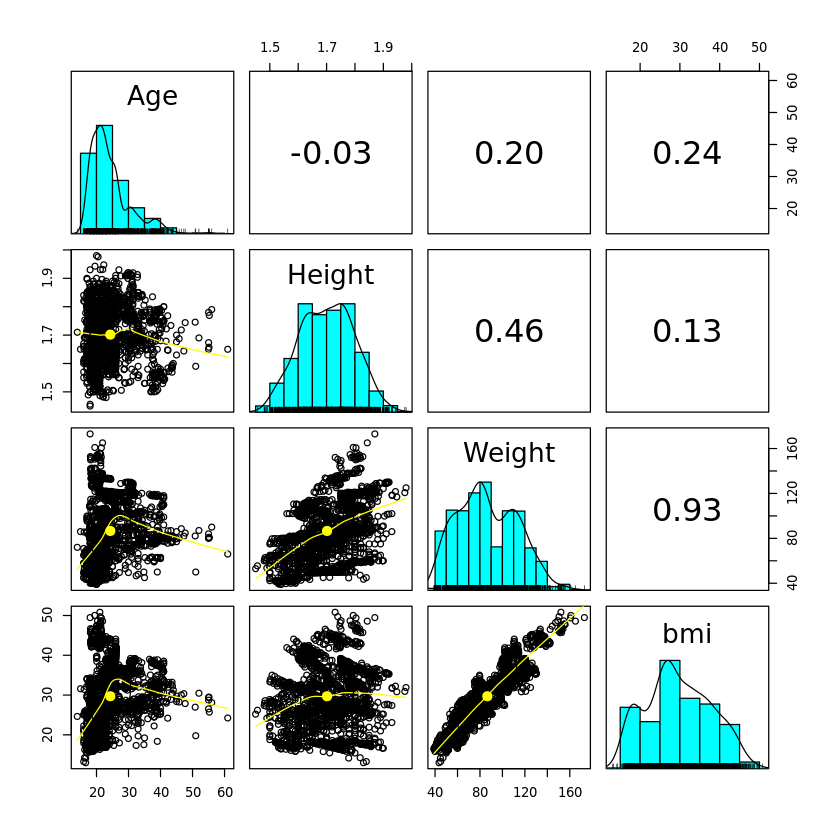

In [7]:
pairs.panels(midata[,c("Age", "Height", "Weight", "bmi")], pch = 1, 
      col = rgb(1, 1, 0, alpha = 1))

Our categorical variables and what they mean:

Gender, 

CAEC, eating food between meals:

* Always
* Frequently
* Sometimes 
* No

SMOKE 

* Yes
* No

family_history_with_overweight

* Yes
* No

FAVC, high caloried food consumption:

* Yes
* No

FCVC, vegetable consumption:

* Never
* Sometimes
* Always

NCP, the number of meals in a day:

* '1-2'
* '3'
* '>3'

CH2O, water consumption:

* '<1'
* '1-2'
* '>2'

SCC, keep track of calories:

* Yes
* No

FAF, physical activity:

* 0
* 1-2
* 2-4
* 4-5

TUE, the hours spent on social media:

* 0-2h
* 3-5h
* more than 5

CALC, alcohol consumption:

* Always
* Frequently
* Sometimes
* No

MTRANS, the type of transformation they use:

* walking
* bike
* public transformation
* automobile
* motorbike

Warning message:
“attributes are not identical across measure variables; they will be dropped”


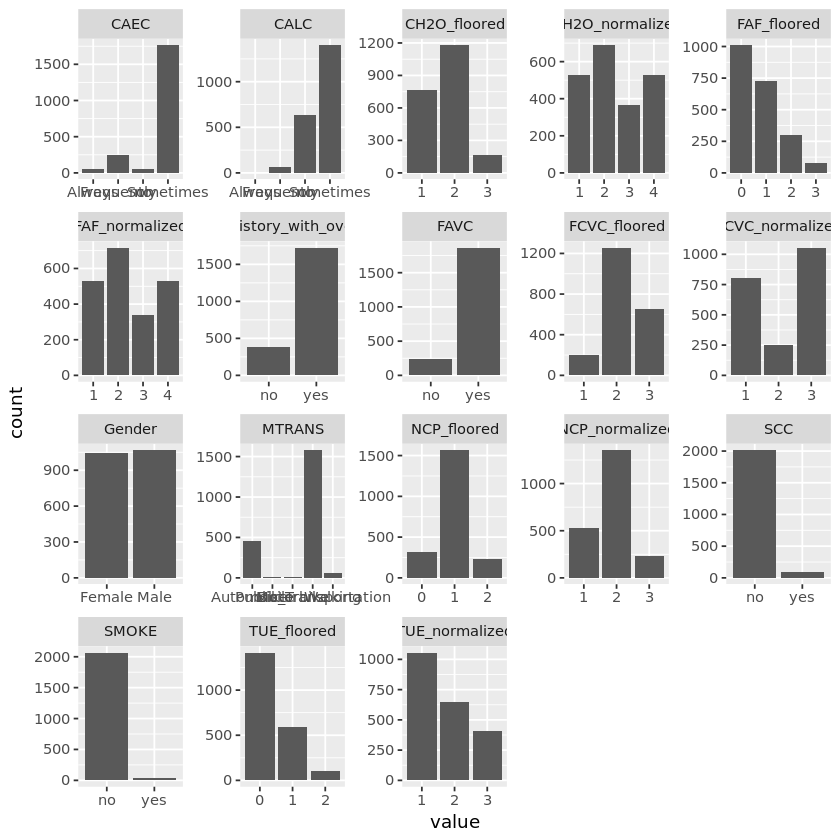

In [8]:
midata%>% select(!c(Age, Height, Weight, bmi, NObeyesdad)) %>%
    tidyr::gather() %>% 
    ggplot(aes(x = value)) + 
    facet_wrap(~ key, scales = "free") + 
    geom_bar()

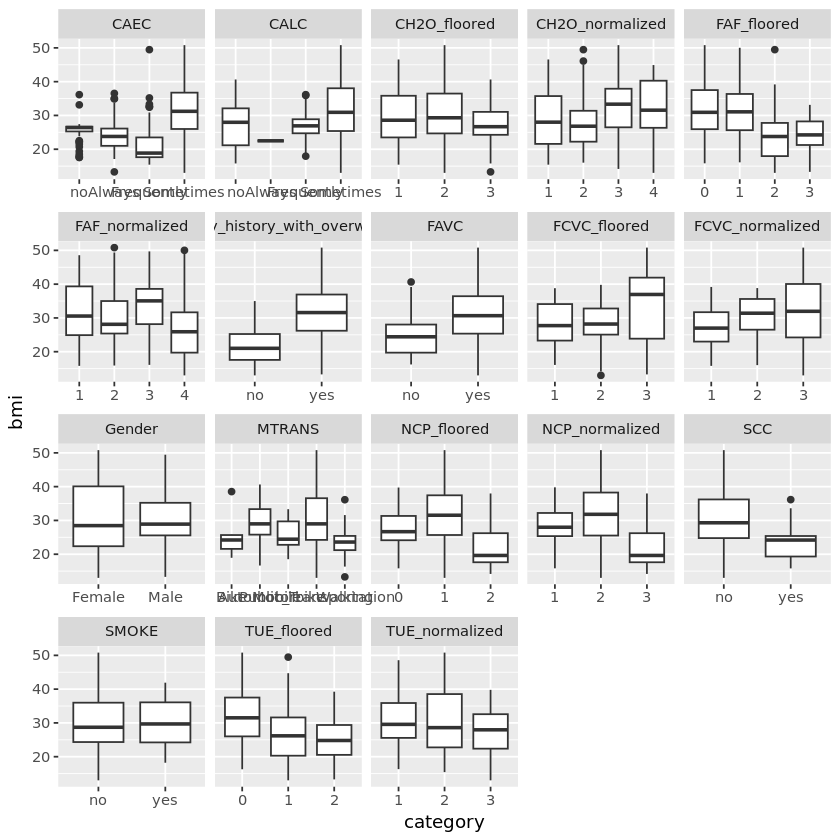

In [9]:
midata%>% pivot_longer(!c(Age, Height, Weight, bmi, NObeyesdad), names_to = "variable", values_to = "category") %>%
ggplot(aes(x = category, y = bmi)) +
geom_boxplot() +
facet_wrap(~ variable, scales = "free_x")  

## Step by Step to Build a Model:

### Excluding the outliers:

What we have done below is to get rid of the outliers in our data, we calculated the Z scores in two tales with .05 for the sake of estimating our BMI results better. 

In [10]:
midata %<>% mutate(z_bmi = BBmisc::normalize(midata$bmi , method = "standardize"))
midata %<>% filter( z_bmi %between% c(-1.96,1.96))

### Excluding the variables whose distribution is not balanced:

We want to see if the data under the variables that can answer yes-no questions are distributed in a somewhat balanced way. To see it first we got rid off the continuous variables by keeping the factors. 

To determine a treshold, we divided the # of rows to 2. To turn them into logical values, we used basic logical tools and assigned them to the colums. After that, since "yes" and "no" logical values are corresponsing to 1 and 0 now, to implement some calculations, we used this feature. After subsetting the columns whose yes-no values cannot satisfy the treshold we created, "Gender" was the only remained categorical variable that we kept.

In [11]:
factors <- midata %>% keep(is.factor) %>% select(family_history_with_overweight, FAVC, SMOKE, SCC, Gender)
factors

family_history_with_overweight,FAVC,SMOKE,SCC,Gender
<fct>,<fct>,<fct>,<fct>,<fct>
yes,no,no,no,Female
yes,no,yes,yes,Female
yes,no,no,no,Male
no,no,no,no,Male
no,no,no,no,Male
no,yes,no,no,Male
yes,yes,no,no,Female
no,no,no,no,Male
yes,yes,no,no,Male


In [12]:
normx <- factors[,.N] / 2
normx

factors$family_history_with_overweight<-factors$family_history_with_overweight=="yes"
factors$FAVC<-factors$FAVC=="yes"
factors$SMOKE<-factors$SMOKE=="yes"
factors$SCC<-factors$SCC=="yes"
factors$Gender <- factors$Gender=="Female"

factors


[1] 1039

family_history_with_overweight,FAVC,SMOKE,SCC,Gender
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
TRUE,FALSE,FALSE,FALSE,TRUE
TRUE,FALSE,TRUE,TRUE,TRUE
TRUE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE


In [13]:
factors_select <- factors %>% 
colSums %>% 
"-"(normx) %>% 
abs %>% 
sort %>%
.[. <= normx / 2] %>% 
names

In [14]:
cor0 <- factors %>% select(all_of(factors_select)) %>% cor
cor0

,Gender
Gender,1


In [15]:
model_data_normalized <- midata %>% select(Gender,Age, bmi, TUE_normalized, NCP_normalized, MTRANS, FCVC_normalized, FAF_normalized, CH2O_normalized, CALC, CAEC, NObeyesdad) 
model_data_floored <- midata %>% select(Gender,Age, bmi, TUE_floored, NCP_floored, MTRANS, FCVC_floored, FAF_floored, CH2O_floored, CALC, CAEC, NObeyesdad) 

## Building Our Model:

Partititon: We set the train ratio 0.7 as we used 0.7 to built the model and 0.3 to test the model if it can give nice results. We also checked the mutuality below.

Before using createdatapartition function, we sampled them manually but since afterwards we realized that maybe because of the the limited number of observations in our dataset to reflect the different types of the categories we normally observe in our data, we encountered an overfitting issue as we observed nicely fitted trained data but not doing so well test data. To overcome this, we used the obesity categorization column in the partition function to have more balanced partitions that captures all kinds of bmi categorizations, not only few of them.

In [16]:
set.seed(123)

train_ratio <- 0.7

train_indices1 <- createDataPartition(model_data_normalized$NObeyesdad, p = 0.7, list = FALSE)
train_indices2 <- createDataPartition(model_data_floored$NObeyesdad, p = 0.7, list = FALSE)
train_data_n <- model_data_normalized[train_indices1]
test_data_n <- model_data_normalized[-train_indices1]
train_data_f <- model_data_floored[train_indices2]
test_data_f <- model_data_floored[-train_indices2]

In [17]:
model_data_normalized[,.N]
train_data_n[,.N]
test_data_n[,.N]
model_data_floored[,.N]
train_data_f[,.N]
test_data_f[,.N]

[1] 2078

[1] 1456

[1] 622

[1] 2078

[1] 1456

[1] 622

In [18]:
model1 <- lm(bmi ~ . - NObeyesdad, train_data_n)
model2 <- lm(bmi ~ . - NObeyesdad , train_data_f)

At this point, as both normalization and floored factors gave nice R2s, we decided on continuing with the method giving a better explanation of the bmi values. Therefore, we went for floored one.

In [19]:
model1 %>% summary

model1 %>% tidy %>% filter(p.value < 0.1)

model2 %>% summary

model2 %>% tidy %>% filter(p.value < 0.1)


Call:
lm(formula = bmi ~ . - NObeyesdad, data = train_data_n)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.4235  -3.5627   0.2698   3.9775  16.5292 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 12.05698    2.57288   4.686 3.05e-06 ***
GenderMale                   0.55073    0.32639   1.687 0.091756 .  
Age                          0.34851    0.03017  11.552  < 2e-16 ***
TUE_normalized2              0.95189    0.36348   2.619 0.008916 ** 
TUE_normalized3             -0.79730    0.42159  -1.891 0.058806 .  
NCP_normalized2              1.87601    0.36186   5.184 2.48e-07 ***
NCP_normalized3             -3.38212    0.56876  -5.946 3.44e-09 ***
MTRANSAutomobile             0.85614    2.17010   0.395 0.693258    
MTRANSMotorbike              3.85810    3.01781   1.278 0.201301    
MTRANSPublic_Transportation  4.77121    2.15325   2.216 0.026861 *  
MTRANSWalking                1.84367    2.28633   0.806 0.4

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),12.0569760,2.57288147,4.686176,3.048406e-06
GenderMale,0.5507274,0.32638811,1.687339,9.175609e-02
Age,0.3485074,0.03016809,11.552188,1.409726e-29
TUE_normalized2,0.9518857,0.36347685,2.618835,8.916265e-03
TUE_normalized3,-0.7972989,0.42159405,-1.891153,5.880572e-02
NCP_normalized2,1.8760051,0.36186360,5.184288,2.478883e-07
NCP_normalized3,-3.3821179,0.56876306,-5.946444,3.438497e-09
MTRANSPublic_Transportation,4.7712082,2.15325280,2.215814,2.686109e-02
FCVC_normalized2,1.0090756,0.50723907,1.989349,4.685278e-02



Call:
lm(formula = bmi ~ . - NObeyesdad, data = train_data_f)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.9013  -3.6600   0.7225   3.8601  14.9176 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 10.01722    2.73828   3.658 0.000263 ***
GenderMale                   1.41155    0.33658   4.194 2.91e-05 ***
Age                          0.32747    0.03163  10.352  < 2e-16 ***
TUE_floored1                -2.22149    0.35242  -6.304 3.86e-10 ***
TUE_floored2                -2.13722    0.71217  -3.001 0.002738 ** 
NCP_floored1                 2.28494    0.43349   5.271 1.56e-07 ***
NCP_floored2                -1.80609    0.62026  -2.912 0.003649 ** 
MTRANSAutomobile             3.40124    2.35458   1.445 0.148812    
MTRANSMotorbike              3.45667    2.86528   1.206 0.227863    
MTRANSPublic_Transportation  7.01485    2.33237   3.008 0.002679 ** 
MTRANSWalking                2.41383    2.52387   0.956 0.3

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),10.0172206,2.73827813,3.658219,2.631828e-04
GenderMale,1.4115465,0.33658147,4.193773,2.911857e-05
Age,0.3274682,0.03163468,10.351557,2.881756e-24
TUE_floored1,-2.2214916,0.35241730,-6.303583,3.864374e-10
TUE_floored2,-2.1372204,0.71217382,-3.000981,2.737651e-03
NCP_floored1,2.2849377,0.43349238,5.270999,1.564666e-07
NCP_floored2,-1.8060870,0.62025991,-2.911823,3.648909e-03
MTRANSPublic_Transportation,7.0148511,2.33236561,3.007612,2.678998e-03
FCVC_floored3,4.4983900,0.55865431,8.052189,1.695172e-15


From the parameter table, we can see some significant reasonable relaitonships between bmi and the transportation type they use, vegetable consumption behavior, physical activity frequency, the 3 of meals a day.

* as the physical activity frequency (FAF) increases, it decreases the bmi as expected,

* as public transportation preference (MTRANS) increases, it increases the bmi, this might be because the decreasing level of physical activity in daily life.

* Although the # of meals (NCP) and the eating behavior(CAEC) between the mails have some unexpected effects on bmi as the more frequently they can be observed, the more the decresing effects on bmi. The reason might be the fact that we do not know the observants' consumption preferences in their meals or the amount they consume even if they prefer vegetables. These two or other omitted variables might be the reasons why there is such a contradiction.

* The time they spent on social media (TUE) is also one of the parameters we can think of when we look at the daily physical inactivity. However, the results seem it has a negative effect on bmi, which is again unexpected. Since we do not know the time they spent during sleeping, or their daily calorie intakes to determine if they need to be active to keep their current weight, this might also be because of the observants' own personal conditions. 


To carry out an investigation to understand if there is a multicollinearity issue at a problematic degree, we used the vif model. Since we couldn't find any high-correlated variables in our model, we kept all the remaining variables.

In [20]:
vif(model2) %>% as.data.table(keep.rownames = T) %>%
setnames(c("rn", "GVIF", "Df", "VIFsqr")) %>%
.[] %>%
mutate(VIF = VIFsqr^2) %>%
filter(VIF > 10)

rn,GVIF,Df,VIFsqr,VIF
<chr>,<dbl>,<dbl>,<dbl>,<dbl>


## Visualization of the Model Results:

We created some plots to see if the residual terms are satisying the assumptions and how well our fitted line can reflect the data variation. Also, the residuals seem okay and distributed around 0 as it should be.

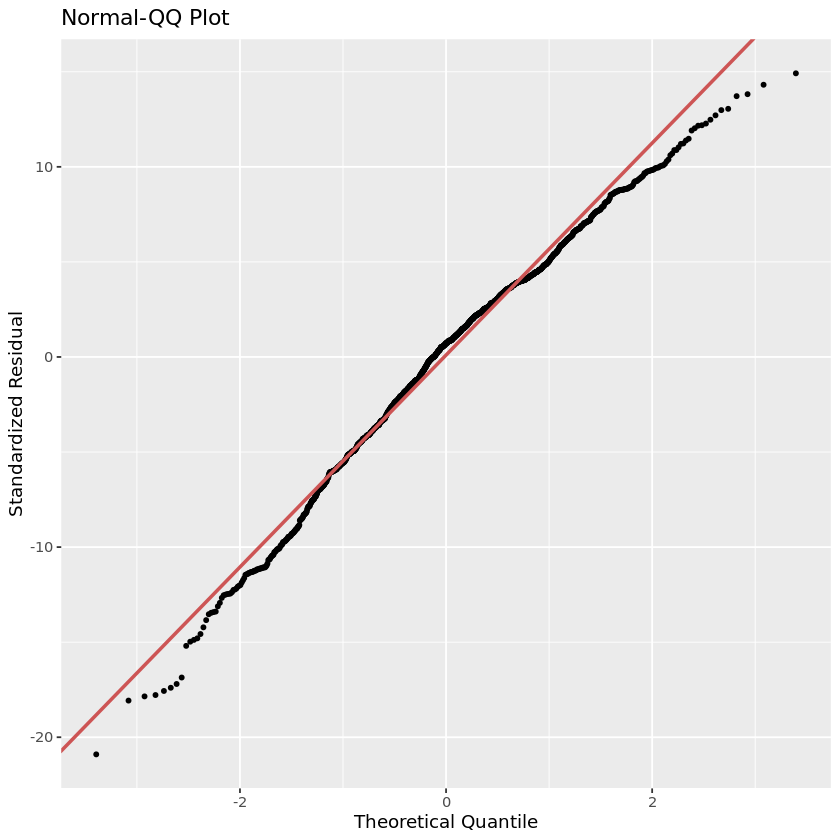

In [21]:
gg_qqplot(model2, scale.factor = 1)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)

actual_train_f <- train_data_f$bmi
predicted_train_f <- predict(model2, train_data_f)

actual_test_f <- test_data_f$bmi
predicted_test_f <- predict(model2, test_data_f)

model_dt_f <- data.table(partition = c("train", "test"),
                       R2 = c(R2(predicted_train_f, actual_train_f),
                                R2(predicted_test_f, actual_test_f)),
                        RMSE = c(RMSE(predicted_train_f, actual_train_f),
                                 RMSE(predicted_test_f, actual_test_f)),
                        MAE = c(MAE(predicted_train_f, actual_train_f),
                                MAE(predicted_test_f, actual_test_f))
                        )

model_dt_f

data.table(actual = actual_train_f, predictions = predicted_train_f) %>%
ggplot(aes(x = actual, y = predictions)) +
geom_point() +
geom_abline(slope = 1, intercept = 0) +
ggtitle("Train Actual vs. Predictions")

data.table(actual = actual_test_f, predictions = predicted_test_f) %>%
ggplot(aes(x = actual, y = predictions)) +
geom_point() +
geom_abline(slope = 1, intercept = 0) +
ggtitle("Test Actual vs. Predictions")

partition,R2,RMSE,MAE
<chr>,<dbl>,<dbl>,<dbl>
train,0.4928078,5.536474,4.424983
test,0.4831972,5.553517,4.439542


In [ ]:
data.table(residuals = actual_train_f - predicted_train_f, predictions = predicted_train_f) %>%
ggplot(aes(x = predictions, y = residuals)) +
geom_point() +
ggtitle("Train Predictions vs. Residuals")

data.table(residuals = actual_test_f - predicted_test_f, predictions = predicted_test_f) %>%
ggplot(aes(x = predictions, y = residuals)) +
geom_point() +
ggtitle("Test Predictions vs. Residuals")

## Enhancement of the Model: Inclusion of the Interaction term: 

To enhance our model, we go further by including the intraction term "Gender" as we might see more intensified effects of these variables when we combined them with gender. We observed that the explained variation in our dataset increased with the inclusion of the interaction term. For example;

* When we look at the variable age, we see that if it is combined with gender, male bmi is likely to increase more with aging.

* As CAEC becomes frequently, they eat between the main meals, it increases the effects on the male bmi. 

* Alcohol consumption decreses the male bmi.

* Water consumption have a decresing effect on the male bmi.

* The meal they have daily has a decresing effect on the male bmi

* The use of technological devices also increases the effect on the male bmi.


In [ ]:
model3 <- lm(bmi ~ (Gender + TUE_floored+ NCP_floored + FCVC_floored + FAF_floored + CH2O_floored + CALC + CAEC +Age)*Gender,
             train_data_f)

In [ ]:
model3 %>% summary
model3 %>% tidy %>% filter(p.value < 0.1)

## Visualization of the Model Results:

The standardized residuals do not seem much better; however, again we have satisfied assumptions.

In [ ]:
gg_qqplot(model3, scale.factor = 1)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)

actual_train_f3 <- train_data_f$bmi
predicted_train_f3 <- predict(model3, train_data_f)

actual_test_f3 <- test_data_f$bmi
predicted_test_f3 <- predict(model3, test_data_f)

model_dt_f3 <- data.table(partition = c("train", "test"),
                       R2 = c(R2(predicted_train_f3, actual_train_f3),
                                R2(predicted_test_f3, actual_test_f3)),
                        RMSE = c(RMSE(predicted_train_f3, actual_train_f3),
                                 RMSE(predicted_test_f3, actual_test_f3)),
                        MAE = c(MAE(predicted_train_f3, actual_train_f3),
                                MAE(predicted_test_f3, actual_test_f3))
                        )

model_dt_f3

data.table(actual = actual_train_f3, predictions = predicted_train_f3) %>%
ggplot(aes(x = actual, y = predictions)) +
geom_point() +
geom_abline(slope = 1, intercept = 0) +
ggtitle("Train Actual vs. Predictions")

data.table(actual = actual_test_f3, predictions = predicted_test_f3) %>%
ggplot(aes(x = actual, y = predictions)) +
geom_point() +
geom_abline(slope = 1, intercept = 0) +
ggtitle("Test Actual vs. Predictions")



In [ ]:
data.table(residuals = actual_train_f3 - predicted_train_f3, predictions = predicted_train_f3) %>%
ggplot(aes(x = predictions, y = residuals)) +
geom_point() +
ggtitle("Train Predictions vs. Residuals")

data.table(residuals = actual_test_f3 - predicted_test_f3, predictions = predicted_test_f3) %>%
ggplot(aes(x = predictions, y = residuals)) +
geom_point() +
ggtitle("Test Predictions vs. Residuals")

## Comments on the Findings:

Different than what we assumed at the beginning of the project, we saw that although we have healthy and active lifestyles, this does not mean that we have to have a lower BMI. We also want to add that since we do not know if these people are on a diet or having a more active life because they are overweight, dedicated themselves to have a more balanced lifestyles to lose weight and answer the survey in a such condition, or ones who are skinny but recently acquired an unpleasent lifestyles, these might also cause such unexpected results. But from the results we have, we can conclude that although we do not have a healthy life for example where we eat frequently, spend so much time on social media or drink alcohol, we cannot say that we have to be overweight. Also, there are some different reactions of our body to different routines changing over gender as well.

# Desicion Tree Model:

Since we couldn't be sure if we have to go through the all types of the analysis methods if possible, we also conducted a tree model as well.

## Model Building:

Again since we couldn2t be sure about how to determine the factor values best, we used 2 of them and then continued one afterwards. We built and train the model and then test it with the 2 differnet partitions of the data.

In [ ]:
rpart_data_normalized <- midata %>% select(Gender,FAVC,SMOKE,SCC,family_history_with_overweight,Age,  TUE_normalized, NCP_normalized, MTRANS, FCVC_normalized, FAF_normalized, CH2O_normalized, CALC, CAEC,NObeyesdad) 
rpart_data_floored <- midata %>% select(Gender,FAVC,SMOKE,SCC,family_history_with_overweight,Age, TUE_floored, NCP_floored, MTRANS, FCVC_floored, FAF_floored, CH2O_floored, CALC, CAEC,NObeyesdad) 

In [ ]:
train_ratio <- 0.7
library(caret)

set.seed(123)
rptrain_indices1 <- createDataPartition(rpart_data_normalized$NObeyesdad, p = 0.7, list = FALSE)
rptrain_indices2 <- createDataPartition(rpart_data_floored$NObeyesdad, p = 0.7, list = FALSE)
rptrain_data_n<- rpart_data_normalized[rptrain_indices1]
rptest_data_n <- rpart_data_normalized [-rptrain_indices1]
rptrain_data_f <- rpart_data_floored[rptrain_indices2]
rptest_data_f <- rpart_data_floored[-rptrain_indices2]


In [ ]:
normalized.rp <- rpart::rpart(NObeyesdad ~ ., data = rptrain_data_n)
floored.rp <- rpart::rpart(NObeyesdad ~ . , data = rptrain_data_f)

Not identical but too similar. So, we decided to continue with the floored one only.

In [ ]:
identical(normalized.rp , floored.rp)
normalized.rp
floored.rp

## Visualization of the Tree

From the tree we got below, we see that for example:

* the males who do not consume vegetables all the time but sometimes eat in between the meals are normalweight whereas women are obese. 
* If they eat vegetable not always, and they are older than 23 and male, they are classified as obese but if they are women and they consume alcohol sometimes, if they are also older than 36 they are obese as well but if they are younger, then just overweight.
* If they eat vegetable not always, and younger than 23 with family history with obesity and eat more meals than average a day, if they do not consume alcohol, they are underweight but if they sometimes drink, they are classified as overweight. 

The classification does not seem very accurate though.

In [ ]:
printcp(floored.rp)
plotcp(floored.rp)
visNetwork::visTree(floored.rp)

## Analysis of the Model Results:

In [ ]:
predictions_train <- predict(floored.rp, rptrain_data_f, type = "class")
confusionMatrix(table(fitted = predictions_train, actual = rptrain_data_f$NObeyesdad))

In [ ]:
predictions_test <- predict(floored.rp, rptest_data_f, type = "class")
confusionMatrix(table(fitted = predictions_test, actual = rptest_data_f$NObeyesdad))

As we can see from the results, insufficient weight, obesity type 1-2-3 can be predicted at least moderately well but classifications for overweight1-2 and normal weight are not doing well. Especially, when we look at the sensitivity of overweight2, we can conclude that the model can capture only few of the actual overweight2 cases. Also it suffers when it try to classify the actual normal weight cases.

Other than these, kappa seems moderate which means the agreement between the model's predictions and the actual values is moderate when there is an account for by chance.
But accuracy is not that high.

## Pruned Version of the Model: 

We wanted to see if we could enhance the model through pruning but at the end of our implementations, we saw no enhancement

In [ ]:
minrow <- which.min(floored.rp$cptable[,"xerror"])
floored.cp <- floored.rp$cptable[minrow,"CP"]
prune_tree <- prune( floored.rp , cp = floored.cp)
visTree(prune_tree)

In [ ]:
predictions_prune_train <- predict(prune_tree, rptrain_data_f, type = "class")
confusionMatrix(table(fitted = predictions_prune_train, actual = rptrain_data_f$NObeyesdad))

In [ ]:
predictions_prune_test <- predict(prune_tree, rptest_data_f, type = "class")
confusionMatrix(table(fitted = predictions_prune_test, actual = rptest_data_f$NObeyesdad))

In [ ]:
rptrain_data_f %>% select(NObeyesdad) %>% gather() %>% ggplot(aes(x = value)) + geom_bar()

In [ ]:
rptest_data_f %>% select(NObeyesdad) %>% gather() %>% ggplot(aes(x = value)) + geom_bar()

In [ ]:
predictions_test <- predict(floored.rp, rptest_data_f, type = "class")
confusionMatrix(table(fitted = predictions_test, actual = rptest_data_n$NObeyesdad))

## Comments on the Findings:

Different than what we assumed at the beginning of the project, we saw that although we have healthy and active lifestyles, this does not mean that we have to have a lower BMI. Also, since our dataset consists of poeple whose habits are not consistent like dedicating themselves to a certain kind of strict living, we couldn't see a certain consistent type of branchs; instead, so many different and unexpected combinations at the end. We also want to add that since we do not know if these people are on a diet or having a more active life because they are overweight, dedicated themselves to have a more balanced lifestyles to lose weight and answer the survey in a such condition, or ones who are skinny but recently acquired an unpleasent lifestyles, these might also cause such unexpected results.

# Clustering:

Clustering didn't work for our data but to show that at least we went through the steps, we kept the codes below if necessary.

In [ ]:
predictions_test %>% levels

In [ ]:
rptest_data_f$NObeyesdad %>% as.factor %>% levels

In [ ]:
midata %>% group_by(NObeyesdad) %>% summarise(n = n())

In [ ]:
midata_nb <- midata %>% select(!c(Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,
                                  NObeyesdad,bmi,Height,Weight))

midata_nb %<>% mutate_at(vars(all_of(colnames(midata_nb))) , as.numeric)

centn <- midata$NObeyesdad %>% as.factor %>% levels %>% length

obcluster <- kmeans(midata_nb , centers = centn)

obcluster

In [ ]:
midata %<>% cbind(clusteringResult = obcluster$cluster %>% as.factor)

In [ ]:
co_match <- midata %>% group_by(clusteringResult , NObeyesdad )%>% summarise(n = n())

In [ ]:
max_n_data <- midata %>% group_by(clusteringResult , NObeyesdad )%>% summarise(n = n()) %>%
group_by(clusteringResult) %>% summarise( max_n = max(n)) 

In [ ]:
new_levels <- co_match %>% filter( clusteringResult %in% max_n_data$clusteringResult & n %in% max_n_data$max_n) %>% select(NObeyesdad)

In [ ]:
levels(midata$clusteringResult) <- new_levels$NObeyesdad

As you can see below, if you have a labelled data, making unsupervised analyze doesn't work.

In [ ]:
midata %>% group_by( NObeyesdad) %>% summarise(n_Nobeyesdad = n()) 
midata %>% group_by(clusteringResult) %>% summarise(n_clusteringResult = n())